Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\Kesler\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\Kesler\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\Kesler\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


-0.07576960577365921
RMSE: 4.9600 g/L


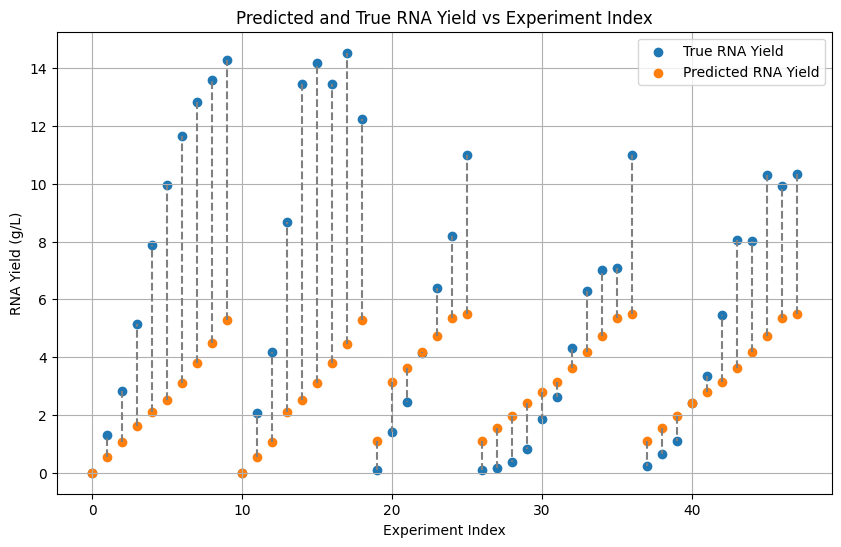

In [1]:
from r3.models.assimulo.assimulo_model import AssimuloIVTModel
import r3.schema as schema
import r3.adapters as adapters
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

X_columns = [
    schema.IVTReactionSchema.pH.value,
    schema.IVTReactionSchema.TIME_min.value,
]
y_columns = [schema.IVTReactionSchema.RNA_g_L.value]
experimental_conditions, response = adapters.DataPipelineAdapter(
    "kate_ph_repeat", verbose=False
).get(
    X_columns=X_columns,
    y_columns=y_columns,
    paths_to_merge=[
        ["charlie_ph", "Sheet1"],
        ["ricardo_ph", "CSP HEPES"],
        ["ricardo_ph", "eGFP HEPES"],
        ["ricardo_ph", "eGFP TRIS"],
    ],
)

model = AssimuloIVTModel(
    template=schema.DNATemplates.ANY,
    experiment_type=schema.ExperimentType.LHS,
)

predictions = model.predict_rna_yield(experimental_conditions, verbose=False)

print(
    r2_score(
        response[schema.IVTReactionSchema.RNA_g_L.value],
        predictions[schema.IVTReactionSchema.RNA_g_L.value],
    )
)

rmse = np.sqrt(
    np.mean(
        (
            response[schema.IVTReactionSchema.RNA_g_L.value]
            - predictions[schema.IVTReactionSchema.RNA_g_L.value]
        )
        ** 2
    )
)
print(f"RMSE: {rmse:.4f} g/L")

# Use integer indices for plotting
experimental_condition_index = np.arange(len(experimental_conditions))

plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_condition_index,
    response[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="True RNA Yield",
)

ax = plt.gca()
for i in experimental_condition_index:
    ax.vlines(
        i,
        predictions[schema.IVTReactionSchema.RNA_g_L.value].iloc[i],
        response[schema.IVTReactionSchema.RNA_g_L.value].iloc[i],
        color="gray",
        linestyle="--",
    )
plt.scatter(
    experimental_condition_index,
    predictions[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="Predicted RNA Yield",
)

plt.xlabel("Experiment Index")
plt.ylabel("RNA Yield (g/L)")
plt.title("Predicted and True RNA Yield vs Experiment Index")
plt.legend()
plt.grid()
plt.show()

In [2]:
model = AssimuloIVTModel(
    template=schema.DNATemplates.ANY,
    experiment_type=schema.ExperimentType.TIME_SERIES,
)
experimental_data = experimental_conditions
experimental_data[y_columns] = response.values
model.fit(experimental_data, y_columns, save_best_params=False, is_sequence=True)

Error during prediction 0: single positional indexer is out-of-bounds with params [5.000e+03 1.167e+01 6.000e+07]
Error during prediction 0: single positional indexer is out-of-bounds with params [5.00000007e+03 1.16700000e+01 6.00000000e+07]
Error during prediction 0: single positional indexer is out-of-bounds with params [5.00000000e+03 1.16700002e+01 6.00000000e+07]
Error during prediction 0: single positional indexer is out-of-bounds with params [5.00000000e+03 1.16700000e+01 6.00000009e+07]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4000e+25                                    0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 2.4000e+25, final cost 2.4000e+25, first-order optimality 0.00e+00.


     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 1.000e+12  1.000e+12 ...  1.000e+12  1.000e+12]
           x: [ 5.000e+03  1.167e+01  6.000e+07]
        cost: 2.4e+25
         jac: [[ 0.000e+00  0.000e+00  0.000e+00]
               [ 0.000e+00  0.000e+00  0.000e+00]
               ...
               [ 0.000e+00  0.000e+00  0.000e+00]
               [ 0.000e+00  0.000e+00  0.000e+00]]
        grad: [ 0.000e+00  0.000e+00  0.000e+00]
  optimality: 0.0
 active_mask: [0 0 0]
        nfev: 1
        njev: 1

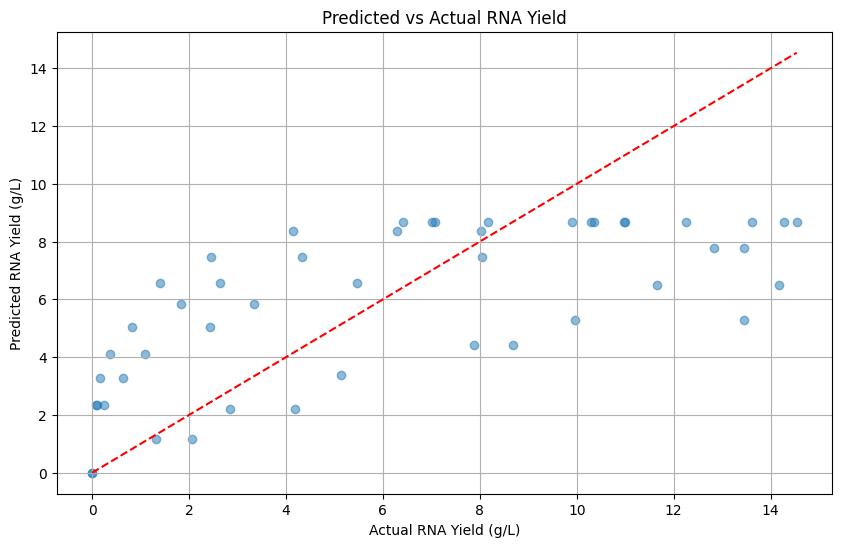

In [5]:
predictions = model.predict_rna_yield(experimental_conditions, verbose=False)

# Plot predictions against the response.
plt.figure(figsize=(10, 6))
plt.scatter(response, predictions, alpha=0.5)
plt.title("Predicted vs Actual RNA Yield")
plt.xlabel("Actual RNA Yield (g/L)")
plt.ylabel("Predicted RNA Yield (g/L)")
plt.plot([response.min(), response.max()], [response.min(), response.max()], "r--")
plt.grid()

0.4503031005507172
RMSE: 3.5456 g/L


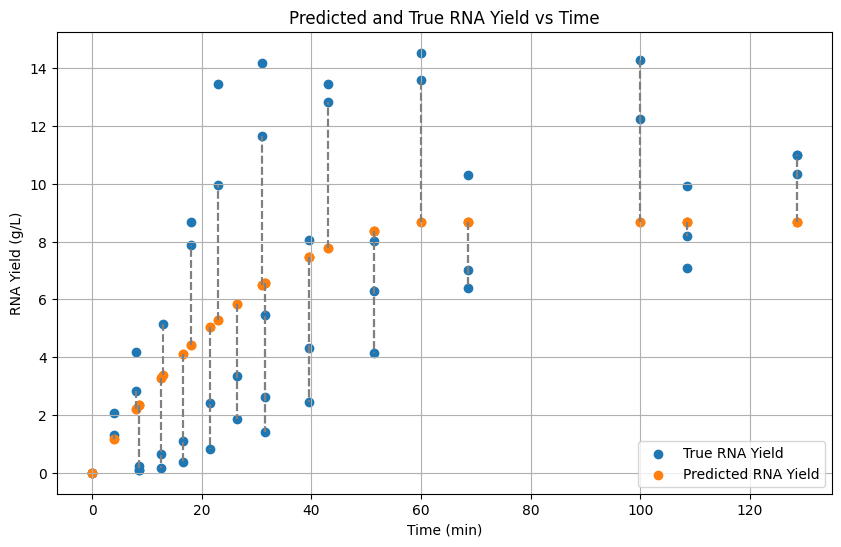

In [6]:
print(
    r2_score(
        response[schema.IVTReactionSchema.RNA_g_L.value],
        predictions[schema.IVTReactionSchema.RNA_g_L.value],
    )
)

# show root mean squared error
rmse = np.sqrt(
    np.mean(
        (
            response[schema.IVTReactionSchema.RNA_g_L.value]
            - predictions[schema.IVTReactionSchema.RNA_g_L.value]
        )
        ** 2
    )
)
print(f"RMSE: {rmse:.4f} g/L")

plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    response[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="True RNA Yield",
)

ax = plt.gca()
for i in experimental_conditions[schema.IVTReactionSchema.TIME_min.value]:
    ax.vlines(
        i,
        predictions.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        response.loc[
            experimental_conditions[schema.IVTReactionSchema.TIME_min.value] == i,
            schema.IVTReactionSchema.RNA_g_L.value,
        ].values[0],
        color="gray",
        linestyle="--",
    )
plt.scatter(
    experimental_conditions[schema.IVTReactionSchema.TIME_min.value],
    predictions[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="Predicted RNA Yield",
)

plt.xlabel("Time (min)")
plt.ylabel("RNA Yield (g/L)")
plt.title("Predicted and True RNA Yield vs Time")
plt.legend()
plt.grid()
plt.show()

0.4503031005507172
RMSE: 3.5456 g/L


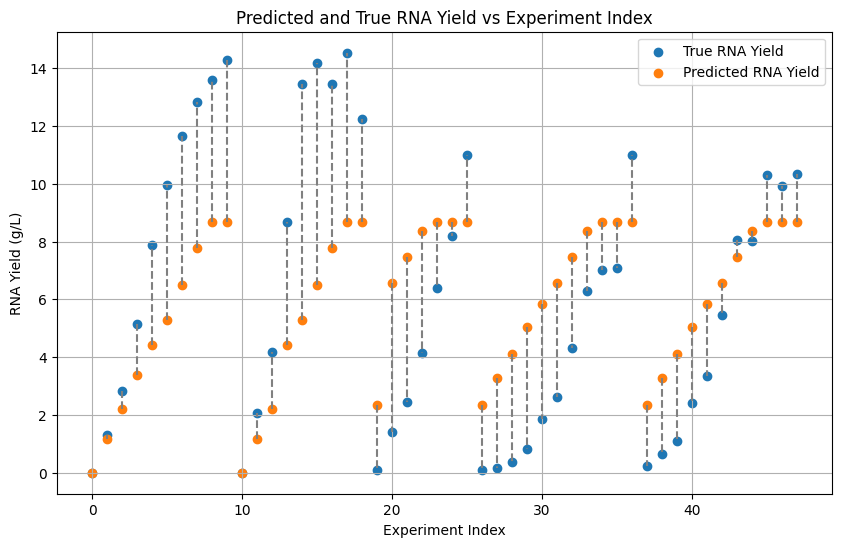

In [7]:
print(
    r2_score(
        response[schema.IVTReactionSchema.RNA_g_L.value],
        predictions[schema.IVTReactionSchema.RNA_g_L.value],
    )
)

rmse = np.sqrt(
    np.mean(
        (
            response[schema.IVTReactionSchema.RNA_g_L.value]
            - predictions[schema.IVTReactionSchema.RNA_g_L.value]
        )
        ** 2
    )
)
print(f"RMSE: {rmse:.4f} g/L")

# Use integer indices for plotting
experimental_condition_index = np.arange(len(experimental_conditions))

plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_condition_index,
    response[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="True RNA Yield",
)

ax = plt.gca()
for i in experimental_condition_index:
    ax.vlines(
        i,
        predictions[schema.IVTReactionSchema.RNA_g_L.value].iloc[i],
        response[schema.IVTReactionSchema.RNA_g_L.value].iloc[i],
        color="gray",
        linestyle="--",
    )
plt.scatter(
    experimental_condition_index,
    predictions[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="Predicted RNA Yield",
)

plt.xlabel("Experiment Index")
plt.ylabel("RNA Yield (g/L)")
plt.title("Predicted and True RNA Yield vs Experiment Index")
plt.legend()
plt.grid()
plt.show()

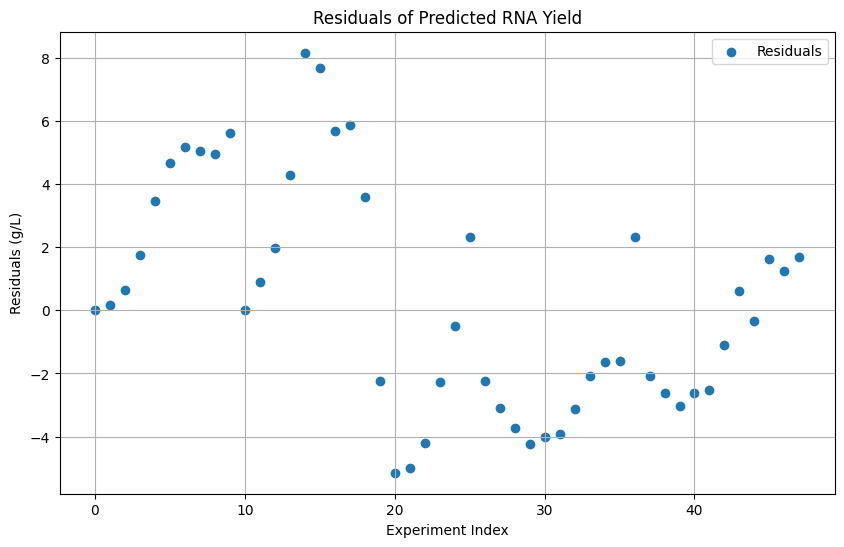

In [8]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(
    experimental_condition_index,
    response[schema.IVTReactionSchema.RNA_g_L.value]
    - predictions[schema.IVTReactionSchema.RNA_g_L.value],
    marker="o",
    label="Residuals",
)
plt.xlabel("Experiment Index")
plt.ylabel("Residuals (g/L)")
plt.title("Residuals of Predicted RNA Yield")
plt.legend()
plt.grid()
plt.show()

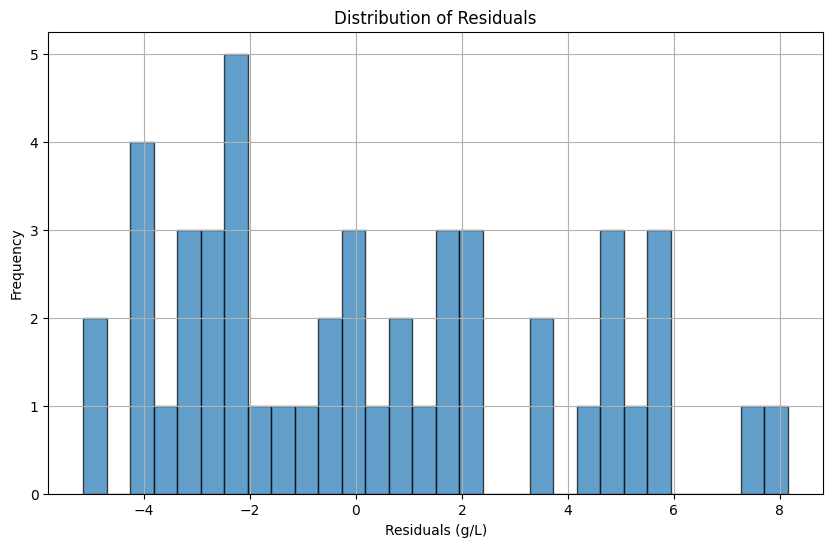

In [9]:
# Plot residuals distribution
plt.figure(figsize=(10, 6))
plt.hist(
    response[schema.IVTReactionSchema.RNA_g_L.value]
    - predictions[schema.IVTReactionSchema.RNA_g_L.value],
    bins=30,
    edgecolor="black",
    alpha=0.7,
)
plt.xlabel("Residuals (g/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid()
plt.show()